<a href="https://colab.research.google.com/github/tselane2110/ML-Specialization/blob/main/StickerSalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [72]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s5e1_path = kagglehub.competition_download('playground-series-s5e1')

print('Data source import complete.')


Data source import complete.


In [73]:
print(playground_series_s5e1_path)

/root/.cache/kagglehub/competitions/playground-series-s5e1


## 1. Importing required libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# getting the path to the files

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/competitions/playground-series-s5e1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/root/.cache/kagglehub/competitions/playground-series-s5e1/test.csv
/root/.cache/kagglehub/competitions/playground-series-s5e1/sample_submission.csv
/root/.cache/kagglehub/competitions/playground-series-s5e1/train.csv


## 2. Importing Dataset

In [136]:
df = pd.read_csv("/root/.cache/kagglehub/competitions/playground-series-s5e1/train.csv")
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


## 3. Performing Exploratory Data Analysis

In [137]:
df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [138]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [139]:
df.dtypes

,0
id,int64
date,object
country,object
store,object
product,object
num_sold,float64


### Changing the datatype of `date` column from 'object' to datetime

* also sorting the data according to the `date` column

In [140]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)  # Make Date the index
df = df.sort_values("date")

In [141]:
# checking for missing values
print(df.isna())

               id  country  store  product  num_sold
date                                                
2010-01-01  False    False  False    False      True
2010-01-01  False    False  False    False     False
2010-01-01  False    False  False    False     False
2010-01-01  False    False  False    False     False
2010-01-01  False    False  False    False     False
...           ...      ...    ...      ...       ...
2016-12-31  False    False  False    False     False
2016-12-31  False    False  False    False     False
2016-12-31  False    False  False    False     False
2016-12-31  False    False  False    False     False
2016-12-31  False    False  False    False     False

[230130 rows x 5 columns]


In [142]:
# deleting the id column as it is irrelevant
df = df.drop('id', axis = 1)

In [143]:
# adding some more columns to analyze data more nicely
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Day"] = df.index.day
df["DayOfWeek"] = df.index.dayofweek  # 0 = Monday, 6 = Sunday

In [144]:
df["num_sold"][0]

<ipython-input-144-787346989922>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["num_sold"][0]


nan

In [145]:
rows_with_nan = df[df.isna().any(axis=1)]
rows_with_nan

,country,store,product,num_sold,Year,Month,Day,DayOfWeek
date,,,,,,,,
2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1,4
2010-01-01,Kenya,Discount Stickers,Holographic Goose,NaN,2010,1,1,4
2010-01-02,Kenya,Discount Stickers,Holographic Goose,NaN,2010,1,2,5
2010-01-02,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,2,5
2010-01-03,Kenya,Discount Stickers,Holographic Goose,NaN,2010,1,3,6
...,...,...,...,...,...,...,...,...
2016-12-29,Canada,Discount Stickers,Holographic Goose,NaN,2016,12,29,3
2016-12-30,Kenya,Discount Stickers,Holographic Goose,NaN,2016,12,30,4
2016-12-30,Canada,Discount Stickers,Holographic Goose,NaN,2016,12,30,4


In [146]:
# checking for unique values for countries
countries = list(df.country.unique())
countries

['Canada', 'Norway', 'Kenya', 'Singapore', 'Italy', 'Finland']

In [147]:
# unique values for the type of stores
df.store.unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [148]:
# unique values for the sticker/product sold
df['product'].unique()

array(['Holographic Goose', 'Kerneler Dark Mode', 'Kerneler',
       'Kaggle Tiers', 'Kaggle'], dtype=object)

In [149]:
# checking if we have any record of the number of stickers sold
# for the discount stickers

discount_sticker = df[df['store'] == 'Discount Stickers']
discount_sticker

,country,store,product,num_sold,Year,Month,Day,DayOfWeek
date,,,,,,,,
2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1,4
2010-01-01,Norway,Discount Stickers,Kerneler Dark Mode,911.0,2010,1,1,4
2010-01-01,Norway,Discount Stickers,Kerneler,791.0,2010,1,1,4
2010-01-01,Norway,Discount Stickers,Kaggle Tiers,1525.0,2010,1,1,4
2010-01-01,Norway,Discount Stickers,Kaggle,1692.0,2010,1,1,4
...,...,...,...,...,...,...,...,...
2016-12-31,Italy,Discount Stickers,Kerneler Dark Mode,351.0,2016,12,31,5
2016-12-31,Italy,Discount Stickers,Kerneler,283.0,2016,12,31,5
2016-12-31,Italy,Discount Stickers,Kaggle Tiers,501.0,2016,12,31,5


### - Analyzing the rows with NaN values

In [150]:
rows_with_nan

,country,store,product,num_sold,Year,Month,Day,DayOfWeek
date,,,,,,,,
2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1,4
2010-01-01,Kenya,Discount Stickers,Holographic Goose,NaN,2010,1,1,4
2010-01-02,Kenya,Discount Stickers,Holographic Goose,NaN,2010,1,2,5
2010-01-02,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,2,5
2010-01-03,Kenya,Discount Stickers,Holographic Goose,NaN,2010,1,3,6
...,...,...,...,...,...,...,...,...
2016-12-29,Canada,Discount Stickers,Holographic Goose,NaN,2016,12,29,3
2016-12-30,Kenya,Discount Stickers,Holographic Goose,NaN,2016,12,30,4
2016-12-30,Canada,Discount Stickers,Holographic Goose,NaN,2016,12,30,4


25.94% of our data has NaN values for the ```num_sold``` column.

In [151]:
# counting the values for each country

count_countries_nan = {}
for i in countries:
    count_countries_nan[i] = rows_with_nan[rows_with_nan["country"] == i].count()

print(count_countries_nan)

{'Canada': country      4246
store        4246
product      4246
num_sold        0
Year         4246
Month        4246
Day          4246
DayOfWeek    4246
dtype: int64, 'Norway': country      0
store        0
product      0
num_sold     0
Year         0
Month        0
Day          0
DayOfWeek    0
dtype: int64, 'Kenya': country      4625
store        4625
product      4625
num_sold        0
Year         4625
Month        4625
Day          4625
DayOfWeek    4625
dtype: int64, 'Singapore': country      0
store        0
product      0
num_sold     0
Year         0
Month        0
Day          0
DayOfWeek    0
dtype: int64, 'Italy': country      0
store        0
product      0
num_sold     0
Year         0
Month        0
Day          0
DayOfWeek    0
dtype: int64, 'Finland': country      0
store        0
product      0
num_sold     0
Year         0
Month        0
Day          0
DayOfWeek    0
dtype: int64}


* Canada has 4246 missing values for ```num_sold```
* Kenya has 4625 missing values for ```num_sold```

### - 1. Analyzing Missing Values for Canada

* Create a new df containing `date` and `num_sold` column for Canada only.
* Plot a timeseries and analyze it.
* Fill the missing values using **"Imputation Technique"**.

In [152]:
df.columns

Index(['country', 'store', 'product', 'num_sold', 'Year', 'Month', 'Day',
       'DayOfWeek'],
      dtype='object')

In [153]:
# analyzing missing values for Canada

cols = ['store', 'product', 'num_sold', 'Year', 'Month', 'Day', 'DayOfWeek']

df_canada = df.loc[df['country'] == 'Canada', cols]
df_canada

,store,product,num_sold,Year,Month,Day,DayOfWeek
date,,,,,,,
2010-01-01,Discount Stickers,Holographic Goose,NaN,2010,1,1,4
2010-01-01,Premium Sticker Mart,Kerneler Dark Mode,1213.0,2010,1,1,4
2010-01-01,Premium Sticker Mart,Kerneler,950.0,2010,1,1,4
2010-01-01,Premium Sticker Mart,Kaggle,2212.0,2010,1,1,4
2010-01-01,Premium Sticker Mart,Holographic Goose,375.0,2010,1,1,4
...,...,...,...,...,...,...,...
2016-12-31,Discount Stickers,Kerneler Dark Mode,471.0,2016,12,31,5
2016-12-31,Discount Stickers,Kerneler,401.0,2016,12,31,5
2016-12-31,Discount Stickers,Kaggle Tiers,622.0,2016,12,31,5


### - Missing Values (Canada)

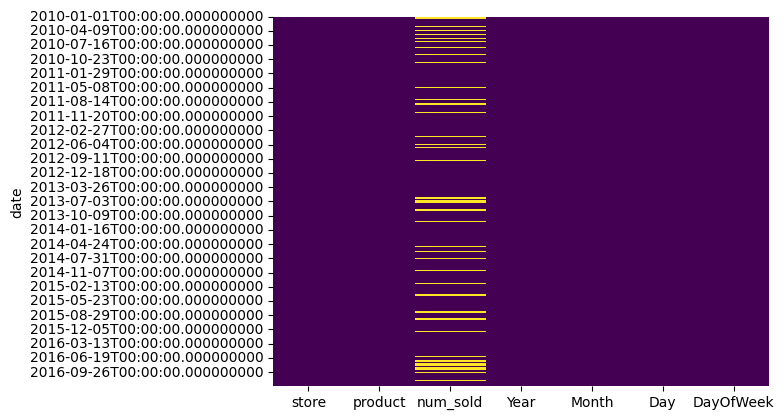

In [157]:
# Check for missing values
df_canada.isnull().sum()

# Visualize missing data
import seaborn as sns
sns.heatmap(df_canada.isnull(), cbar=False, cmap="viridis")
plt.show()


* Trend Analysis

<Axes: title={'center': 'Total Sales in Canada by Year'}, xlabel='Year'>

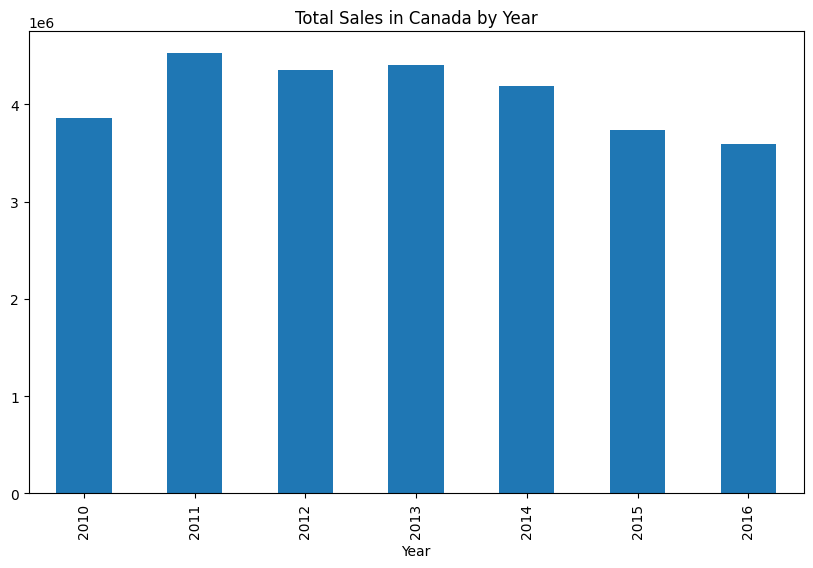

In [154]:
# Plot sales by year
df_canada.groupby("Year")["num_sold"].sum().plot(kind="bar", figsize=(10, 6), title="Total Sales in Canada by Year")


* Seasonality

<Axes: title={'center': 'Average Sales in Canada by Month'}, xlabel='Month'>

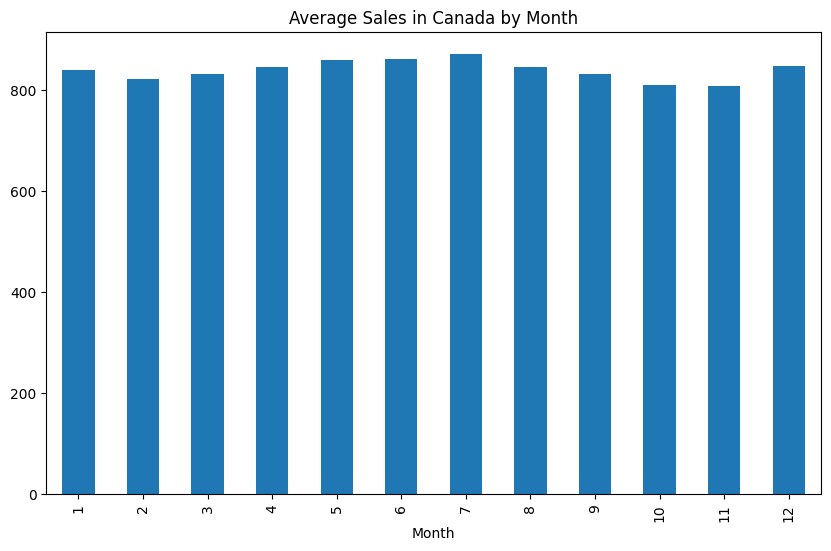

In [155]:
# Plot sales by month
df_canada.groupby("Month")["num_sold"].mean().plot(kind="bar", figsize=(10, 6), title="Average Sales in Canada by Month")


* Weekly Trends

<Axes: title={'center': 'Average Sales in Canada by Day of Week'}, xlabel='DayOfWeek'>

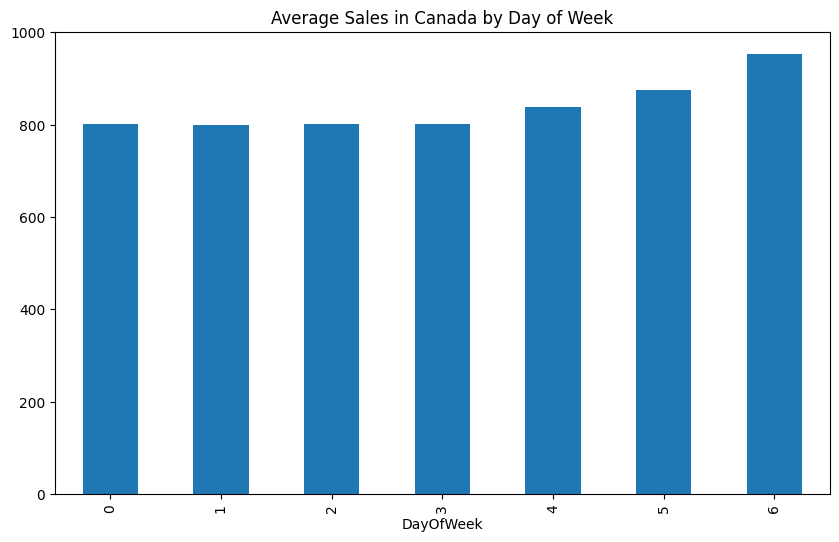

In [156]:
# Plot sales by day of the week
df_canada.groupby("DayOfWeek")["num_sold"].mean().plot(kind="bar", figsize=(10, 6), title="Average Sales in Canada by Day of Week")


### - Label Encoding for the String cols (Canada only)

In [125]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding the columns 'store' and 'product'
encoder = LabelEncoder()
df_canada["Store"] = encoder.fit_transform(df_canada["store"])
df_canada["Product"] = encoder.fit_transform(df_canada["product"])

df_canada_new = df_canada.drop(['store', 'product'], axis = 1)
df_canada_new

,num_sold,Year,Month,Day,DayOfWeek,Store,Product
date,,,,,,,
2010-01-01,NaN,2010,1,1,4,0,0
2010-01-01,973.0,2010,1,1,4,0,1
2010-01-01,906.0,2010,1,1,4,0,2
2010-01-01,423.0,2010,1,1,4,0,3
2010-01-01,491.0,2010,1,1,4,0,4
...,...,...,...,...,...,...,...
2016-12-31,309.0,2016,12,31,5,1,0
2016-12-31,2170.0,2016,12,31,5,1,1
2016-12-31,1711.0,2016,12,31,5,1,2


### Heatmap (canada related data only)

- should deal with the missing values before using heatmap
- should deal w the outliers before using the heatmap
- should scale the data before trying the heatmap
- data should be sorted by date before trying the heatmap

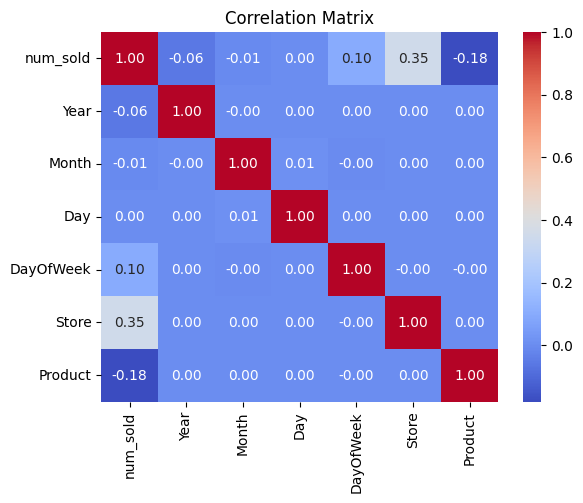

In [129]:
import seaborn as sns

# Calculate and plot correlation
sns.heatmap(df_canada_new.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### - 2. Analyzing Missing Values for Kenya

* Create a new df containing `date` and `num_sold` column for Kenya only.
* Plot a timeseries and analyze it.
* Fill the missing values using **"Imputation Technique"**.

In [118]:
# analyzing missing values for Kenya

cols = ['store', 'product', 'num_sold', 'Year', 'Month', 'Day', 'DayOfWeek']

df_kenya = df.loc[df['country'] == 'Kenya', cols]
df_kenya

,store,product,num_sold,Year,Month,Day,DayOfWeek
date,,,,,,,
2010-01-01,Discount Stickers,Holographic Goose,NaN,2010,1,1,4
2010-01-01,Discount Stickers,Kaggle,20.0,2010,1,1,4
2010-01-01,Discount Stickers,Kaggle Tiers,16.0,2010,1,1,4
2010-01-01,Discount Stickers,Kerneler,8.0,2010,1,1,4
2010-01-01,Discount Stickers,Kerneler Dark Mode,9.0,2010,1,1,4
...,...,...,...,...,...,...,...
2016-12-31,Premium Sticker Mart,Holographic Goose,10.0,2016,12,31,5
2016-12-31,Premium Sticker Mart,Kaggle,72.0,2016,12,31,5
2016-12-31,Premium Sticker Mart,Kaggle Tiers,58.0,2016,12,31,5


### Next Steps:

* Create a new df which contains all the cols from the main original dataset but the rows for the Kenya and Canada are replaced by the new ones with the imputated values.